In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# remove parentheses
def trim(token):
    while token.startswith('('):
        token = token[1:]
    while token.endswith(')'):
        token = token[:-1]
    return token

eng_arr = []
ref_arr = []
trans_arr = []
f_arr = []
tok_len_arr = []

def read_file():
    count = 0
    avg_p = 0
    avg_r = 0

    def compute_accuracy(reference, translation):
        translated_tokens = translation.split(' ')
        reference_tokens = reference.split(' ')
        trimmed_translated_tokens = [trim(token) for token in translated_tokens]
        trimmed_reference_tokens = [trim(token) for token in reference_tokens]

        # precision = correct / output-length
        # recall = correct / reference-length
        # f = p * q * 2 / (p + q)
        correct = list((Counter(trimmed_reference_tokens) & Counter(trimmed_translated_tokens)).elements())
        overlap = len(correct)
        # return if denom is 0
        if overlap == 0:
            return 0, 0, 0
        precision = overlap / len(trimmed_translated_tokens)
        recall = overlap / len(trimmed_reference_tokens)
        f = precision * recall * 2 / (precision + recall)
        return round(f, 3), precision, recall

    with open('../data/generated_daide_clean.txt', 'r') as f:
        lines = f.read()
        entries = lines.split('\n\n')
    
    for entry in entries:
        count += 1
        english, reference, translation = entry.split('\n')
        accuracy, avg_p, avg_r = compute_accuracy(reference, translation)
        eng_arr.append(english)
        ref_arr.append(reference)
        trans_arr.append(translation)
        f_arr.append(accuracy)
        tok_len_arr.append(len(english.split(' ')))

    print('Average precision:', round(avg_p / count, 3))
    print('Average recall:', round(avg_r / count, 3))
    return lines

In [3]:
read_file()
d = {'English': eng_arr, 'Sentence Length': tok_len_arr, 'Reference': ref_arr, 'Translation': trans_arr, 'F-Score': f_arr}
df = pd.DataFrame(data=d)
df

Average precision: 0.0012953367875647669
Average recall: 0.0017271157167530224


,English,Sentence Length,Reference,Translation,F-Score
0,"Hi Italy, hope you're doing well. I'll be figu...",35,PRP (DMZ (FRA ITA) (PIE LYO WES TYS)),PRP ((FRA FLT MAR) BLD),0.308
1,I'm hoping to get to Mun this round. if you co...,25,PRP ((ITA SUP ((FRA AMY RUH) MTO MUN)) (FRA SU...,PRP ((FRA FLT MUN) MTO (RUH) SUP (TYR)),0.667
2,"Alternatively, pressure R somehow to take away...",10,PRP (PRP (NOT (RUS SUP MUN))),PRP (PRS (RUS) (MUN)),0.600
3,"I haven't heard back from anyone else yet, so ...",62,PRP (ALY (GER AUS)),PRP (ALY (TUR ITA)),0.500
4,Absolutely. One of my favorite things about th...,43,YES (ALY (AUS GER)),PRP (ABS (GER AUT) (FRA ITA) (NAO ENG) (RUS)),0.154
...,...,...,...,...,...
574,Hi germany! Are you up for Sil as a DMZ? It wo...,53,PRP (DMZ (RUS GER) (SIL)),PRP (DMZ (GER SIL) (NAO NWG)),0.727
575,Hey Austria! How's it going? I am hoping we ca...,39,PRP (ALY (TUR)),PRP (AUS (SER GRE) (ALB BUL)),0.222
576,Hi Turkey! I fully agree that we should stay p...,31,(YES (PCE (AUS TUR))) (PRP ((SCD (TUR (GRE BUL...,PRP (DMZ (TUR ITA) (GRE BUL) (ROM SER)),0.476
577,That sounds good. If we stick together we can ...,27,YES (ALY (TUR AUS)),PRP (ALY (TUR ITA)) PRP (DMZ (FRA ITA) (PIE LY...,0.190


In [4]:
df.sort_values(by=['F-Score'], ascending=False)

,English,Sentence Length,Reference,Translation,F-Score
102,Hi germany! Are you up for Sil as a DMZ? It wo...,55,PRP (DMZ (RUS GER) (SIL)),PRP (DMZ (GER SIL) (RUS)),1.000
98,Hello neighbor. We have quite an historic rela...,17,PRP (DMZ (GER AUS) (TYR)),PRP (DMZ (AUS GER) (TYR)),1.000
118,So let's work something out. I'd love for us t...,19,PRP (ALY (ENG FRA GER)),PRP (ALY (ENG FRA GER)),1.000
83,Hi Italy! A Russian Italian alliance can be a ...,35,PRP (ALY (RUS ITA)),PRP (ALY (RUS ITA)),1.000
517,"Yes, it's fine. Sooo, ig the game is in grace ...",60,((FRA FLT BRE) BLD) (PRP ((GER FLT KIE) BLD)),PRP (BLD (FRA FLT BRE) (GER FLT KIE)),0.941
...,...,...,...,...,...
409,But are you and I good?,6,ALY (GER ENG),PRP (DMZ (FRA ITA) (PIE LYO WES TYS)),0.000
544,Not really coordinating no,4,NOT (ALY (AUS)),PRP (QRY (FRA ITA)),0.000
545,"I'm sad, because it feels like I lost a friend...",19,NOT (ALY (TUR AUS)),PRP (SAD (FRI LOS)),0.000
324,Nah idk about that but strong enough to leave ...,14,ALY (GER ENG),PRP (DMZ (NAO IRI) (NAF ION)),0.000


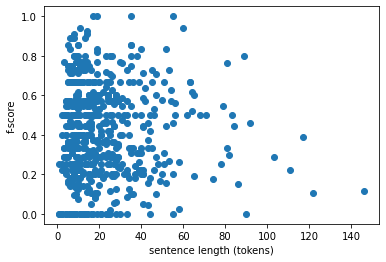

In [5]:
x = np.array(df['Sentence Length'])
y = np.array(df['F-Score'])

plt.scatter(x, y)
plt.xlabel("sentence length (tokens)")
plt.ylabel("f-score")
plt.show()

In [6]:
df.sort_values(['F-Score', 'Sentence Length'], ascending=[True, True])

,English,Sentence Length,Reference,Translation,F-Score
492,Yes,1,ALY (RUS TUR),PRP (HLP (ITA)),0.000
528,Yes,1,(AUS AMY SER) MTO RUM,PRP (HLP (ITA)),0.000
362,Absolutely not.,2,NOT (ALY (ITA GER) VSS (ENG)),PRP (NVR (ABS)),0.000
389,I agree,2,YES (ALY (ENG GER)),PRP (SUP (FRA AMY) MTO MUN),0.000
321,Yes I can promise,4,NOT ((GER AMY MUN) MTO TYR),PRP (PRM (NCS (FRA ITA))),0.000
...,...,...,...,...,...
517,"Yes, it's fine. Sooo, ig the game is in grace ...",60,((FRA FLT BRE) BLD) (PRP ((GER FLT KIE) BLD)),PRP (BLD (FRA FLT BRE) (GER FLT KIE)),0.941
98,Hello neighbor. We have quite an historic rela...,17,PRP (DMZ (GER AUS) (TYR)),PRP (DMZ (AUS GER) (TYR)),1.000
118,So let's work something out. I'd love for us t...,19,PRP (ALY (ENG FRA GER)),PRP (ALY (ENG FRA GER)),1.000
83,Hi Italy! A Russian Italian alliance can be a ...,35,PRP (ALY (RUS ITA)),PRP (ALY (RUS ITA)),1.000


In [7]:
rslt_df = df[df['F-Score'] < 0.01]
rslt_df.shape
# 41 sentences with f-score = 0

(41, 5)

In [8]:
np.average(df['F-Score'])

0.415300518134715

In [9]:
# use daideapp to check the validity of the DAIDE orders
from daidepp import *
grammar = create_daide_grammar(level=130)
ref_count = 0
valid_count = 0
trnsln_count = 0
idx_arr = []

for index, row in df.iterrows():
    ref = row['Reference']
    trnsln = row['Translation']
    try:
        parse_tree = grammar.parse(ref)
        output = daide_visitor.visit(parse_tree)
    except:
        continue
    else:
        ref_count += 1
        try:
            parse_tree = grammar.parse(trnsln)
            output = daide_visitor.visit(parse_tree)
        except:
            continue
        else:
            valid_count += 1
            idx_arr.append(index)
print(ref_count)
print(valid_count)
print(valid_count / ref_count * 100)

for index, row in df.iterrows():
    trnsln = row['Translation']
    try:
        parse_tree = grammar.parse(trnsln)
        output = daide_visitor.visit(parse_tree)
    except:
        continue
    else:
        trnsln_count += 1
print(trnsln_count)

# in 579 orders annotated, 78 references are valid DAIDE orders
# 27 translations are valid DAIDE orders
# 6 sentences have both valid references and translations
# 7.7% of the references are valid DAIDE orders

78
6
7.6923076923076925
27


In [10]:
# sentences which have both valid reference and translation
filter_df  = df[df.index.isin(idx_arr)]
filter_df

,English,Sentence Length,Reference,Translation,F-Score
88,"So as you likely see, Germany and France have ...",43,PRP (ALY (ENG ITA) VSS (GER FRA)),PRP (DMZ (FRA GER) (MAR SPA)),0.462
90,"Bonjour, happy to keep it a dmz for now.",9,PRP (DMZ (ITA FRA) (PIE)),PRP (DMZ (FRA ITA) (PIE LYO WES TYS)),0.769
98,Hello neighbor. We have quite an historic rela...,17,PRP (DMZ (GER AUS) (TYR)),PRP (DMZ (AUS GER) (TYR)),1.000
308,Nonaggression in piedmont,3,PRP (DMZ (ITA FRA) (PIE)),PRP (DMZ (FRA ITA) (PIE LYO WES TYS)),0.769
484,Suggest we demilitarize Piedmont and Gulf of T...,26,PRP (DMZ (ITA FRA) (MAR TYR)),PRP (DMZ (FRA ITA) (PIE LYO WES TYS)),0.571
578,"Hi Italy, hope you're doing well. I'll be figu...",35,PRP (DMZ (FRA ITA) (PIE WES)),PRP (DMZ (FRA ITA) (PIE LYO WES TYS)),0.857
